# Introdução ao OCR - Parte 1

### Importando as bibliotecas necessárias

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Obtendo datasets e normalizando os dados

Vamos obter os dados para treino/teste do dataset mnist (API de dados do Keras).
Cada imagem tem somente um canal de output, com 1 byte sendo usado para representar a imagem (ou 8 bits). Portanto, cada pixel pode ser um valor inteiro de 0 a 255.

In [41]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalização para que todos os valores fiquem entre 0 e 1 ao invés de 0 e 255
x_train = x_train / 255.0
x_test = x_test / 255.0

In [42]:
print(f"O número de dígitos de treino é: {x_train.shape[0]}")
print(f"Dimensionalidade ({x_train.shape[1]},{x_train.shape[2]}) pixels para cada imagem")

O número de dígitos de treino é: 60000
Dimensionalidade (28,28) pixels para cada imagem


In [43]:
print(f"O número de dígitos de teste é: {x_test.shape[0]}")
print(f"Dimensionalidade ({x_test.shape[1]},{x_test.shape[2]}) pixels para cada imagem")

O número de dígitos de teste é: 10000
Dimensionalidade (28,28) pixels para cada imagem


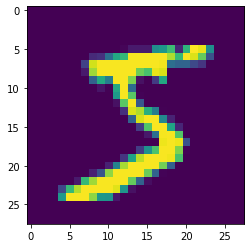

In [44]:
plt.imshow(x_train[0])

In [45]:
print(f"Classificação da imagem acima é: {y_train[0]}")

Classificação da imagem acima é: 5


In [46]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Design do Modelo de Deep Learning

* Redes neurais são construídas considerando junções de vários layers (camadas). Vamos usar um modelo com três camadas. Para informações da API de Layers do Keras, ver https://keras.io/api/layers/.
* Primeiro Layer: tf.keras.layers.Flatten converte nossos arrays (28 x 28) em um array unidimensional (28 x 28 = 784). 
* Segundo e Terceiro Layers: tf.keras.layers.Dense. O segundo layer tem 128 neurons e o terceiro tem 10 neurons (pois temos números de 0 a 9), onde teremos como retorno 10 scores de probabilidade para identificar os dígitos.
* Por fim, devemos definir as funções de ativação da Rede Neural (ver https://www.tensorflow.org/api_docs/python/tf/keras/activations para mais opções das que usamos aqui).

In [47]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Otimização e Loss Function

* Agora que definimos os layers (estrutura) do nosso modelo, precisamos de mais 2 parâmetros. A função perda e o otimizador.
* A função perda (ou Loss Function) basicamente é o parâmetro quantitativo que irá avaliar quão preciso (próximo dos resultados corretos) nosso modelo está a cada iteração.
* O otimizador é um algoritmo (como Gradiente Descendente ou Algoritmos Genéticos) que implementa uma forma de fazer com que o modelo "aprenda" de forma mais eficiente.

In [48]:
model.compile(optimizer='adam', # Otimizador
              loss='sparse_categorical_crossentropy', # Loss Function
              metrics=['accuracy']) # Métrica de performance

### Mãos a obra! Treinando o modelo

In [49]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2625 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1164 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0810 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0610 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0199 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

### Avaliando performance no dataset de testes

In [50]:
model.evaluate(x_test,  y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9766


[0.08854617923498154, 0.9765999913215637]

## Vamos fazer alguns testes...

In [51]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 0s 983us/step


array([2.3538005e-08, 3.5292261e-10, 7.4869899e-07, 2.3322762e-04,
       7.5535796e-13, 8.5427736e-09, 1.2667326e-15, 9.9976557e-01,
       4.7321894e-08, 3.7112949e-07], dtype=float32)

In [52]:
np.argmax(predictions[0])

7

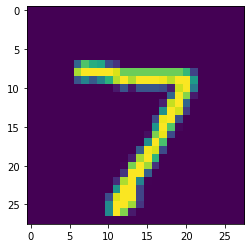

In [53]:
plt.imshow(x_test[0])

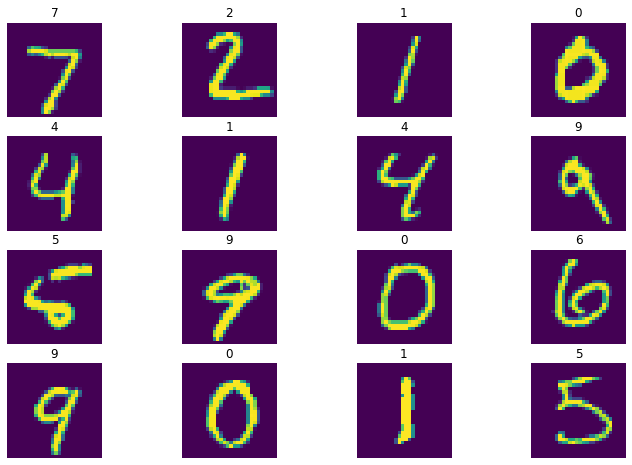

In [54]:
_, ax = plt.subplots(4, 4, figsize=(12, 8))
for i in range(16):
    img = (y_test[i])
    label = str(img)
    ax[i // 4, i % 4].imshow(x_test[i])
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
plt.show()

Códigos e texto baseados no Post: https://medium.com/swlh/build-your-first-neural-network-for-image-classification-in-keras-3457011ce4b3

Referências Adicionais: 

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms (https://arxiv.org/abs/1708.07747)

DRAW: A Recurrent Neural Network For Image Generation (https://arxiv.org/abs/1502.04623)